<center>
    
# Определение возраста покупателей.
    
</center>

## Описание проекта.

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

__Бизнес-задача.__<br>
Необходимо построить модель, которая по фотографии определит приблизительный возраст человека. В нашем распоряжении набор фотографий людей с указанием возраста.

__Задача МО.__<br>
Необходимо построить нейросеть со средней абсолютной ошибкой $MAE$ не более $8$ лет.

1. Провести исследовательский анализ набора фотографий.
2. Подготить данные к обучению.
3. Обученить нейронную сети и рассчитать её качество.

__Данные.__
- Данные взяты с сайта [ChaLearn Looking at People.](http://chalearnlap.cvc.uab.es/dataset/26/description/) Они находятся в папке `/datasets/faces/`. 
- В нашем распоряжении одна папка со всеми изображениями `/final_files` и CSV-файл `labels.csv` с двумя колонками: `file_name` и `real_age`. 

<a id ='table_of_contents'></a>


__Содержание.__
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта." data-toc-modified-id="Описание-проекта.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта.</a></span></li><li><span><a href="#Загрузка-библиотек." data-toc-modified-id="Загрузка-библиотек.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка библиотек.</a></span></li><li><span><a href="#Установка-параметров-проекта." data-toc-modified-id="Установка-параметров-проекта.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Установка параметров проекта.</a></span></li><li><span><a href="#Загрузка-датафрейма-с-разметкой-данных." data-toc-modified-id="Загрузка-датафрейма-с-разметкой-данных.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка датафрейма с разметкой данных.</a></span></li><li><span><a href="#Исследовательский-анализ-данных." data-toc-modified-id="Исследовательский-анализ-данных.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных.-Вывод." data-toc-modified-id="Исследовательский-анализ-данных.-Вывод.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Исследовательский анализ данных. Вывод.</a></span></li></ul></li><li><span><a href="#Обучение-модели." data-toc-modified-id="Обучение-модели.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение модели.</a></span><ul class="toc-item"><li><span><a href="#Функции-создания-загрузчкиков-и-обучения-модели." data-toc-modified-id="Функции-создания-загрузчкиков-и-обучения-модели.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Функции создания загрузчкиков и обучения модели.</a></span></li><li><span><a href="#Результат-обучения-модели." data-toc-modified-id="Результат-обучения-модели.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Результат обучения модели.</a></span></li></ul></li><li><span><a href="#Анализ-обученной-модели." data-toc-modified-id="Анализ-обученной-модели.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Анализ обученной модели.</a></span></li><li><span><a href="#Чек-лист." data-toc-modified-id="Чек-лист.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист.</a></span></li></ul></div>

## Загрузка библиотек.
    
<a href='#table_of_contents'>К содержанию.</a>

---

In [1]:
# Загрузка библиотек для работы с датафреймами и изображениями.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Загрузка библиотеки keras и нейросети ResNet.
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, 
#                                      Dropout, Flatten)
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.resnet import ResNet50

## Установка параметров проекта.
    
<a href='#table_of_contents'>К содержанию.</a>

---

In [2]:
# Определим путь к файлам.
BASE_PATH = '/datasets/faces/'
IMG_PATH = 'final_files/'

## Загрузка датафрейма с разметкой данных.
    
<a href='#table_of_contents'>К содержанию.</a>

---
- Загрузим датайрейм и проверим результат.

In [3]:
# Загрузим разметку.
labels = pd.read_csv(BASE_PATH+'labels.csv')
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


## Исследовательский анализ данных.
    
<a href='#table_of_contents'>К содержанию.</a>

---

- Выведем информацию о данных.
- Выведем распределение возрастов в данных в цифрах и графиках.
- Выведем 20 первых фотографий (загрузку всех изображений с помощью `ImageDataGenerator` отложим до начала моделирования).


- Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB

- Количество дубликатов названий файлов: 0

- Названия файлов отсортированы по возрастанию.
Все файлы представлены в формате ".jpg".

- Информация о распределении значений:


,count,mean,std,min,25%,50%,75%,max
real_age,7591.0,31.201159,17.14506,1.0,20.0,29.0,41.0,100.0


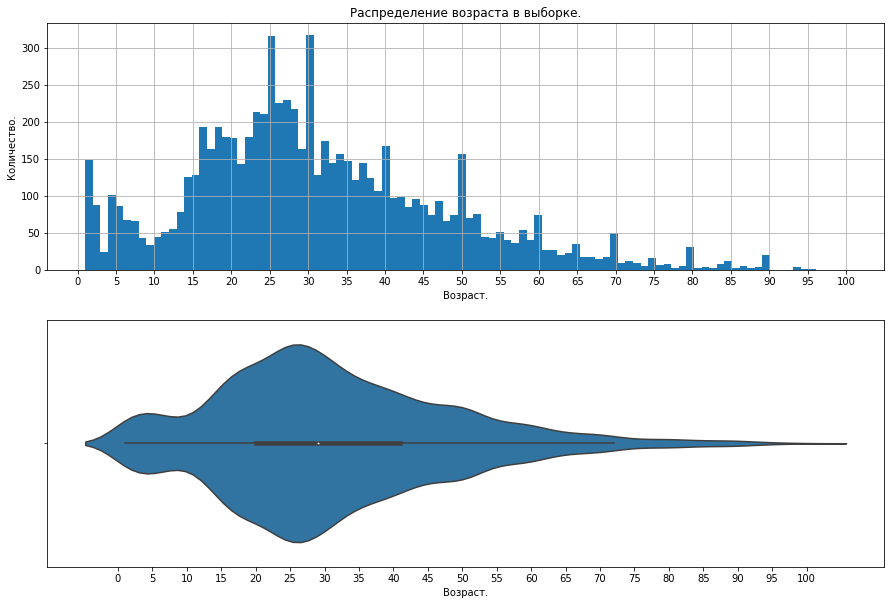

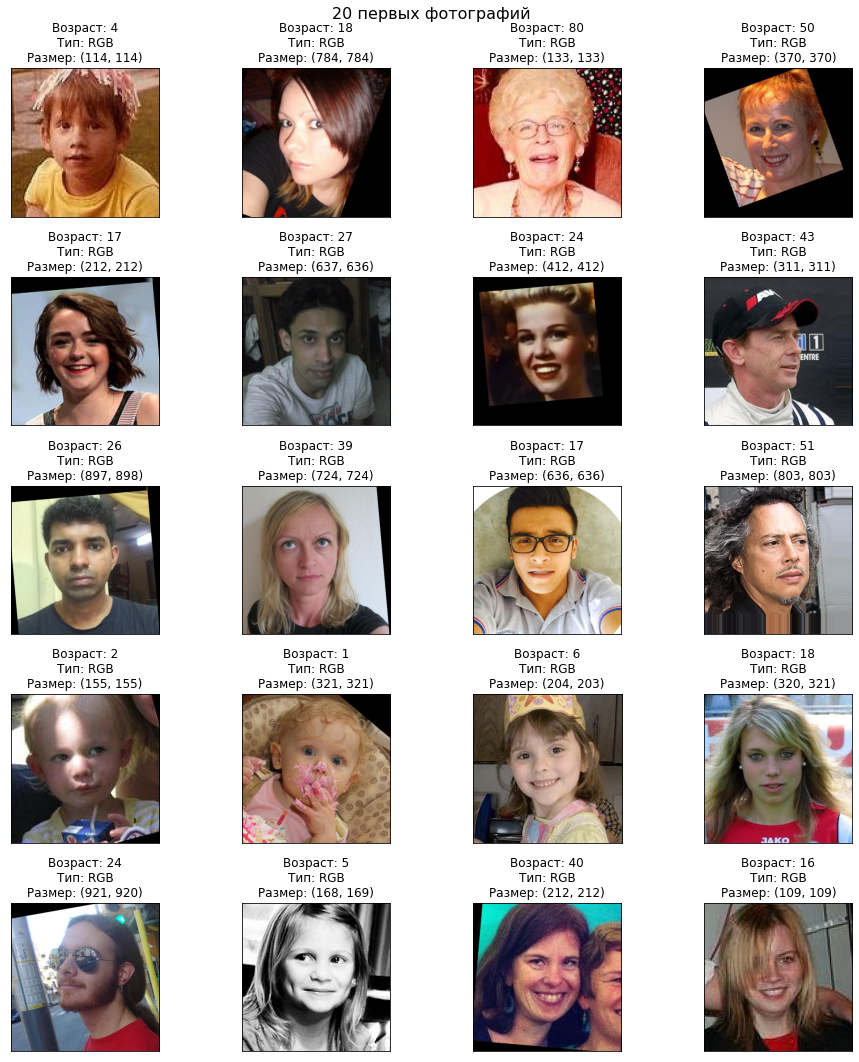

In [25]:
# Выведем информацию о датафрейме.
print('\n\033[1m- Информация о датафрейме:\033[0m')
labels.info()
print('\n\033[1m- Количество дубликатов названий файлов:\033[0m'+
      f' {labels.file_name.duplicated().sum()}')
if labels.file_name.is_monotonic:
    print('\n\033[1m- Названия файлов отсортированы по '+
          'возрастанию.\033[0m')
if (labels.file_name.str.contains('.jpg').sum() == \
    labels.file_name.shape[0]):
    print('Все файлы представлены в формате ".jpg".')
print('\n\033[1m- Информация о распределении значений:\033[0m')
display(labels.describe().T)


# Выведем гистограмму возраста.
bins = labels.real_age.max()
fig, axs = plt.subplots(2,1, facecolor='white', figsize=(15, 10))
labels.real_age.hist(bins=bins, ax=axs[0])
sns.violinplot(data=labels, x='real_age', ax=axs[1])
axs[0].set_title('Распределение возраста в выборке.')
axs[0].set_ylabel('Количество.')
axs[0].set_xlabel('Возраст.')
axs[1].set_xlabel('Возраст.')
axs[0].set_xticks(range(0, bins+1, 5))
axs[1].set_xticks(range(0, bins+1, 5))
plt.show();


# fig = plt.figure(figsize=(8, 8))
# columns = 4
# rows = 5
# for i in range(1, columns*rows +1):
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(img)
# plt.show()


# Выведем 20 первых фото.
i, row, col = 0, 5, 4
fig = plt.figure(facecolor='white', figsize=(15, 15))
fig.suptitle('20 первых фотографий', fontsize=14)
for i in range(row * col):
    file_name = labels.file_name[i]
    age = labels.real_age[i]
    image = Image.open(BASE_PATH+IMG_PATH+file_name)
    fig.add_subplot(row, col, i+1)
    plt.imshow(np.array(image))
    plt.title(f'Возраст: {age}\nТип: {image.mode}\n'+
              f'Размер: {str(image.size)}')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show();

### Исследовательский анализ данных. Вывод.
    
<a href='#table_of_contents'>К содержанию.</a>

---

__Датафрейм с разметкой.__<br>
- Размерность датафрейма: $7591$ объектов, $2$ столбца. Данных достаточно для обучения свёрточной нейросети.<br>
Столбцы содержат:
  - столбец `file_name`: отсортированные по возрастанию названия файлов с фотографиями
  - столбец `real_age` - целевой признак: возраст людей на фотографиях в целочисленном формате от $1$ года до $100$ лет.
- Пропуски и дубликаты.
  - Пропусков не обнаружено.
  - Дубликатов названий файлов не обнаружено.
- Формат данных.
  - Признак `real_age` представлен в формате `int64`. Возможна замена на `int8`.
- Распределение возрастов.
  - Распределение неравномерно  с положительной ассиметрией.
    - Возрасты до $15$ и после $50$ представлены в меньшем количестве, что может снизить качество их определения. 
    - наиболее представительной возрастной группой являются молодые люди в возрасте от 20 до 40, что, как указано в оригинальном исследовании, является следствием сбора фотографий в публичных интернет репозиториях где данная группа более активна.
    - Возможно дополнение данных аугментацией изображений малых возрастных групп.
  
  - Возрасты каждые $10$ лет для значений в интервале $[20,90]$ представлены бо́льшим количеством фотографий, что может улучшить разделение возрастных групп.
  
__Изображения.__<br>
  - Размеры изображений необходимо привести к единому стандарту.  
  - Изображения имеют формат _.jpg_ и каналы _RGB_.
  - Некоторые изображения "усложнены": повёрнуты, обрезаны, переведены в чёрно-белый формат, имеют головные уборы, имеют измененный ракурс и повёрнутые лица, неполно освещены, имеют посторонние предметы перед лицом и т.д. <br>
  Данные усложнения могут как ухудшить результат прогноза, так и не повлиять на него, т.к. используемые веса __imagenet__ не были получены идентификацией лиц (подробнее в разделе обучения моделей).
  
__Задача МО.__<br>
Т.к. присутствует количественный целевой признак, задача сводится к обучению с учителем c помощью нейросети с оптимизацией метрики $MAE$.

## Обучение модели.
    
<a href='#table_of_contents'>К содержанию.</a>

---

- Для определения приблизительного возраста по фотографиям, воспользуемся методом трансферного обучения и используем изученный в текущем спринте "костяк" нейросети __ResNet50__ c инициализацией весов __imagenet__.

> Судя по некоторым исследованиям, например, <a href="https://yosinski.com/deepvis#:~:text=Important%20features%20such%20as%20face%20detectors%20and%20text%20detectors%20are%20learned">статье Джейсона Йосински</a>, нейросеть даёт хорошие результаты при определении человеческих лиц, несмотря на то, что в ней отсутствуют классы "лицо", "человек" или подобные. 
> Судя по наблюдениям в статье, нейросеть определяет лица, например, из-за того, что они связаны с галстуком-бабочкой, который имеет свой класс.

- Создадим четыре функции для обучения и тестирования модели.
  - Функцию создания загрузчика данных __Keras__ для обучающей и тестовой выборок с нормализацией изображений и приведением их к единому размеру.
  - Функцию создания модели 
    - с инициализацией обучаемого "костяка" __ResNet50__;
    - с весами __imagenet__;
    - с глобальным усреднением;
    - с заданной головой:
      - с регуляризацией методом `dropout` - "отключением" части нейронов для избежания переобучения;
      - одним полносвязным слоем с активацией `relu` для предсказания только положительных значений возраста;
    - c оптимизацией `Adam` и коэффициентом скорости обучения $= 0.0001$;
    - с функцией потерь $MSE$ для ускорения работы;
    - c оптимизируемой метрикой $MAE$ в соответствии с поставленной задачей МО.
  - Функцию обучения модели с 20 эпохами обучения.

Код обучения модели и вывод результата её обучения на экран представлен в ячейках ниже.
(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

### Функции создания загрузчкиков и обучения модели.

```python
def load_train(path):    
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25, 
                                       rescale=1./255)
    train_data = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset = 'training',
        seed=12345
        )
    
    print('train dataloader created...')

    return train_data


def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    validation_datagen = ImageDataGenerator(validation_split=0.25, 
                                            rescale=1./255)
    validation_data = validation_datagen.flow_from_dataframe(
    dataframe = labels,
    directory=path +'final_files/',
    x_col="file_name",
    y_col="real_age", 
    class_mode="raw", 
    target_size=(224,224), 
    batch_size=32,
    subset = "validation",
    seed=12345,
    )

    print('validation dataloader created...')

    return validation_data

def create_model(input_shape):
    print('model compiling started...')
    backbone = ResNet50(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False,
        pooling='avg'
        )
    backbone.trainable = True
    model = Sequential()
    model.add(backbone)
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='relu')) 
    optimizer = Adam(lr=.0001)
    model.compile(optimizer=optimizer, 
                  loss='mse', 
                  metrics=['mae'])
    
    print('model compiled...')
    print(model.summary())

    return model 

def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    print('model training started...')
    model.fit(train_data, 
              validation_data=test_data,
              batch_size = batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model 

```

### Результат обучения модели.

```
Found 5694 validated image filenames.
train dataloader created...
Found 1897 validated image filenames.
validation dataloader created...
model compiling started...
model compiled...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
=================================================================
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
None
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
model training started...
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/20
2024-03-25 11:23:08.495996: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-03-25 11:23:10.080040: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 69s - loss: 264.4928 - mae: 11.5241 - val_loss: 1027.0300 - val_mae: 27.3811
Epoch 2/20
178/178 - 37s - loss: 64.0936 - mae: 6.1174 - val_loss: 806.5360 - val_mae: 23.0850
Epoch 3/20
178/178 - 37s - loss: 32.2864 - mae: 4.3580 - val_loss: 265.7565 - val_mae: 11.9386
Epoch 4/20
178/178 - 38s - loss: 21.7996 - mae: 3.6025 - val_loss: 130.9320 - val_mae: 8.3628
Epoch 5/20
178/178 - 37s - loss: 15.9585 - mae: 3.0643 - val_loss: 97.3185 - val_mae: 7.3303
Epoch 6/20
178/178 - 37s - loss: 13.4661 - mae: 2.7978 - val_loss: 73.5743 - val_mae: 6.4568
Epoch 7/20
178/178 - 37s - loss: 11.4683 - mae: 2.5992 - val_loss: 74.0059 - val_mae: 6.4273
Epoch 8/20
178/178 - 37s - loss: 9.9997 - mae: 2.3972 - val_loss: 67.0742 - val_mae: 6.2025
Epoch 9/20
178/178 - 38s - loss: 9.5818 - mae: 2.3354 - val_loss: 75.0195 - val_mae: 6.5215
Epoch 10/20
178/178 - 38s - loss: 8.9614 - mae: 2.2474 - val_loss: 69.0056 - val_mae: 6.2456
Epoch 11/20
178/178 - 37s - loss: 8.3032 - mae: 2.1635 - val_loss: 69.9236 - val_mae: 6.2932
Epoch 12/20
178/178 - 37s - loss: 7.5535 - mae: 2.0770 - val_loss: 80.0149 - val_mae: 6.6871
Epoch 13/20
178/178 - 38s - loss: 7.4611 - mae: 2.0425 - val_loss: 71.1358 - val_mae: 6.2779
Epoch 14/20
178/178 - 38s - loss: 6.5650 - mae: 1.9429 - val_loss: 68.0665 - val_mae: 6.1971
Epoch 15/20
178/178 - 37s - loss: 6.5295 - mae: 1.9161 - val_loss: 76.2815 - val_mae: 6.4517
Epoch 16/20
178/178 - 37s - loss: 6.3059 - mae: 1.8958 - val_loss: 65.0646 - val_mae: 6.0466
Epoch 17/20
178/178 - 38s - loss: 6.2511 - mae: 1.8982 - val_loss: 71.5320 - val_mae: 6.5245
Epoch 18/20
178/178 - 38s - loss: 6.1690 - mae: 1.8683 - val_loss: 78.2107 - val_mae: 6.5155
Epoch 19/20
178/178 - 38s - loss: 6.0625 - mae: 1.8590 - val_loss: 65.2802 - val_mae: 6.1647
Epoch 20/20
178/178 - 37s - loss: 5.9362 - mae: 1.8283 - val_loss: 72.0796 - val_mae: 6.3281
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 9s - loss: 72.0796 - mae: 6.3281
Test MAE: 6.3281
```

### Результат обучения модели. ВЕРСИЯ 2
```
Found 5694 validated image filenames.
train dataloader created...
Found 1897 validated image filenames.
validation dataloader created...
model compiling started...
model compiled...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
=================================================================
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
None
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
model training started...
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/20
2024-03-26 07:05:42.652214: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-03-26 07:05:43.021868: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 52s - loss: 221.8669 - mae: 10.7135 - val_loss: 983.9806 - val_mae: 26.6355
Epoch 2/20
178/178 - 42s - loss: 76.5435 - mae: 6.6114 - val_loss: 597.1318 - val_mae: 18.9737
Epoch 3/20
178/178 - 42s - loss: 50.5646 - mae: 5.3972 - val_loss: 380.1097 - val_mae: 14.3874
Epoch 4/20
178/178 - 41s - loss: 35.9613 - mae: 4.5945 - val_loss: 112.2478 - val_mae: 7.9464
Epoch 5/20
178/178 - 41s - loss: 28.5047 - mae: 4.0975 - val_loss: 83.2379 - val_mae: 6.8491
Epoch 6/20
178/178 - 41s - loss: 22.0891 - mae: 3.6193 - val_loss: 87.2076 - val_mae: 7.0154
Epoch 7/20
178/178 - 42s - loss: 19.3112 - mae: 3.3737 - val_loss: 89.1826 - val_mae: 7.0383
Epoch 8/20
178/178 - 41s - loss: 17.1845 - mae: 3.1635 - val_loss: 64.0864 - val_mae: 6.0657
Epoch 9/20
178/178 - 42s - loss: 14.5629 - mae: 2.9332 - val_loss: 68.0809 - val_mae: 6.1994
Epoch 10/20
178/178 - 42s - loss: 12.1601 - mae: 2.6482 - val_loss: 68.3548 - val_mae: 6.3319
Epoch 11/20
178/178 - 42s - loss: 11.5661 - mae: 2.5815 - val_loss: 63.1956 - val_mae: 6.0075
Epoch 12/20
178/178 - 42s - loss: 10.8476 - mae: 2.4616 - val_loss: 62.8601 - val_mae: 5.8924
Epoch 13/20
178/178 - 42s - loss: 10.0134 - mae: 2.3675 - val_loss: 61.1944 - val_mae: 5.8275
Epoch 14/20
178/178 - 42s - loss: 9.6741 - mae: 2.3360 - val_loss: 69.2852 - val_mae: 6.4124
Epoch 15/20
178/178 - 41s - loss: 8.6091 - mae: 2.2254 - val_loss: 63.0403 - val_mae: 6.0354
Epoch 16/20
178/178 - 42s - loss: 8.6126 - mae: 2.2053 - val_loss: 59.9773 - val_mae: 5.7776
Epoch 17/20
178/178 - 41s - loss: 7.6516 - mae: 2.0769 - val_loss: 63.2579 - val_mae: 5.9862
Epoch 18/20
178/178 - 40s - loss: 8.3221 - mae: 2.1588 - val_loss: 69.2535 - val_mae: 6.1388
Epoch 19/20
178/178 - 41s - loss: 7.8114 - mae: 2.1027 - val_loss: 64.6174 - val_mae: 5.9553
Epoch 20/20
178/178 - 41s - loss: 8.2056 - mae: 2.1632 - val_loss: 68.7916 - val_mae: 6.1997
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 68.7916 - mae: 6.1997
Test MAE: 6.1997
```

## Анализ обученной модели.
    
<a href='#table_of_contents'>К содержанию.</a>

---

__Результат обучения.__
- Модель __ResNet50__ c инициализацией весов __imagenet__ и заданной "головой" успешно определила возраст людей по фотографиям.<br> 
Финальное значение целевой метрики, средней абсолютной ошибки - $MAE = 6.33$, что ниже минимального порога в $8$ лет и является неплохим результатом.
- Модель непереобучена, т.к. функция потерь $MSE$ и метрика $MAE$ снижаются постепенно и на обучающей и на валидационной выборках.

__Возможные улучшения.__
- Возможно улучшение результата с увеличением количества эпох и дополнительным перебором гиперпараметров.

__Рекомендации заказчику.__
- Учитывая некритичность задачи, рекомендуем модель как метод определения возрастных групп для формирования предложений товаров.
- Т.к. ошибка модели недостаточно низка, рекомендуем заказчику использование автоматической фотофиксации только как дополнительного метода контроля добросовестности кассиров при продаже алкоголя, вместе с кросс-контролем кассиров или контролем менеджеров.